In [1]:
import os
import sys
import os
from collections import defaultdict

import pandas as pd

src_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
if src_path not in sys.path:
    sys.path.append(src_path)

DATA_BASEPATH = os.path.abspath(os.path.join(os.getcwd(), "..","../Data"))

from eval import PlotSimilarity

In [2]:
EXP_NAMES = ['benchmark','zero_shot', 'few_shot', 'instruct']
POST_IDS = ['1atcjtj', '1au5njg', '18w4y9z']

In [3]:
simdf_path = os.path.abspath(os.path.join(DATA_BASEPATH, 'eval_results/sim_dfs/'))
data = {exp_name: [] for exp_name in EXP_NAMES}

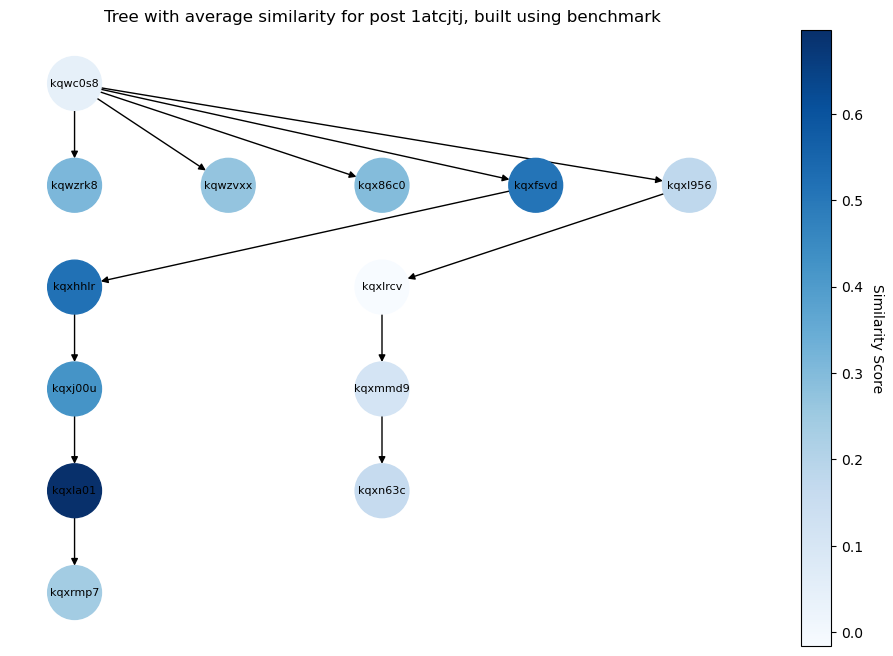

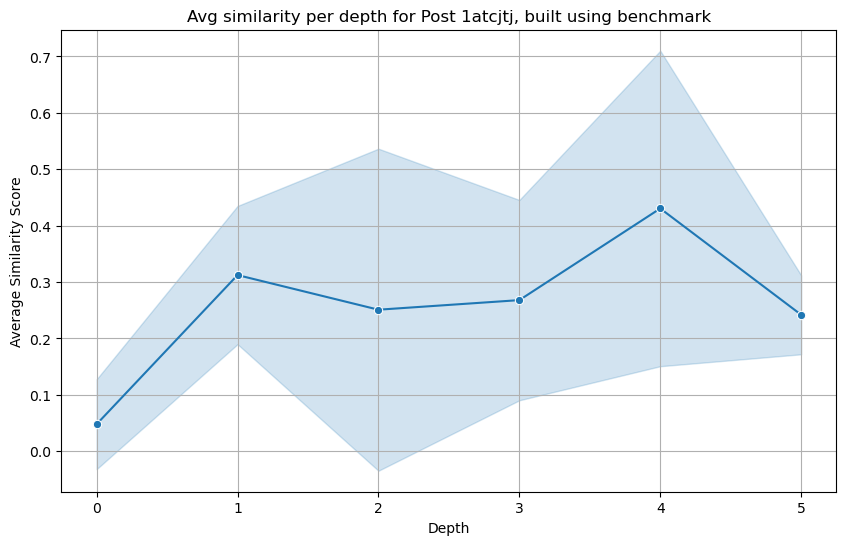

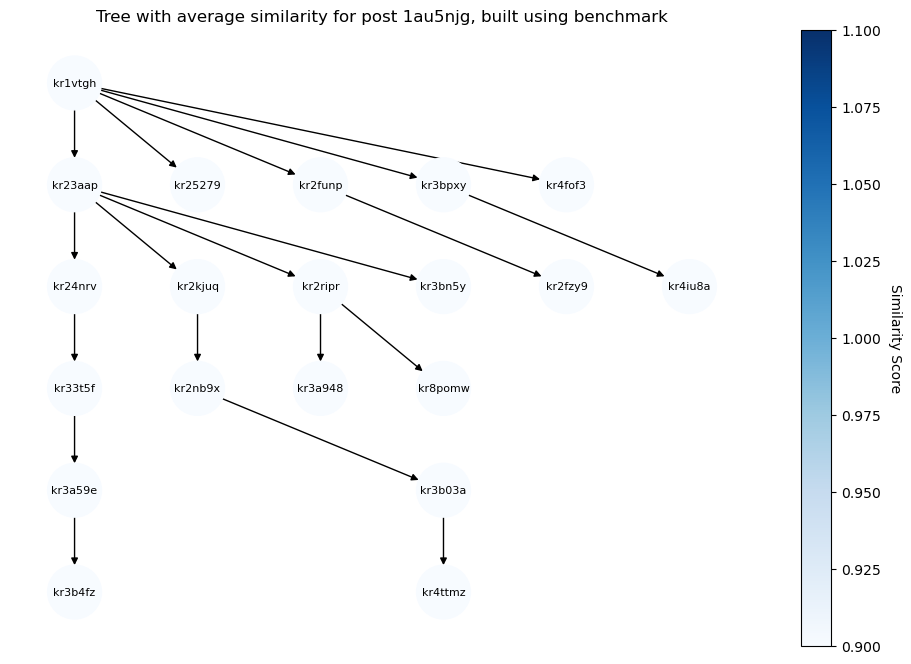

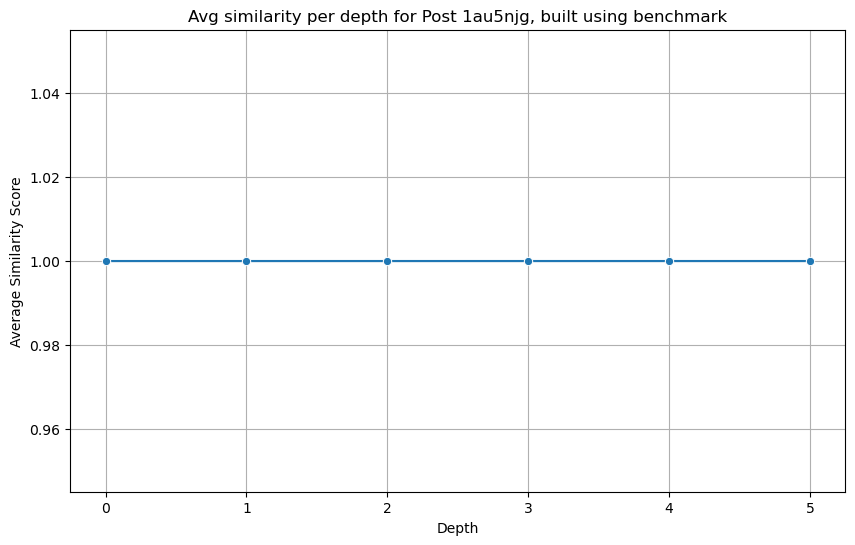

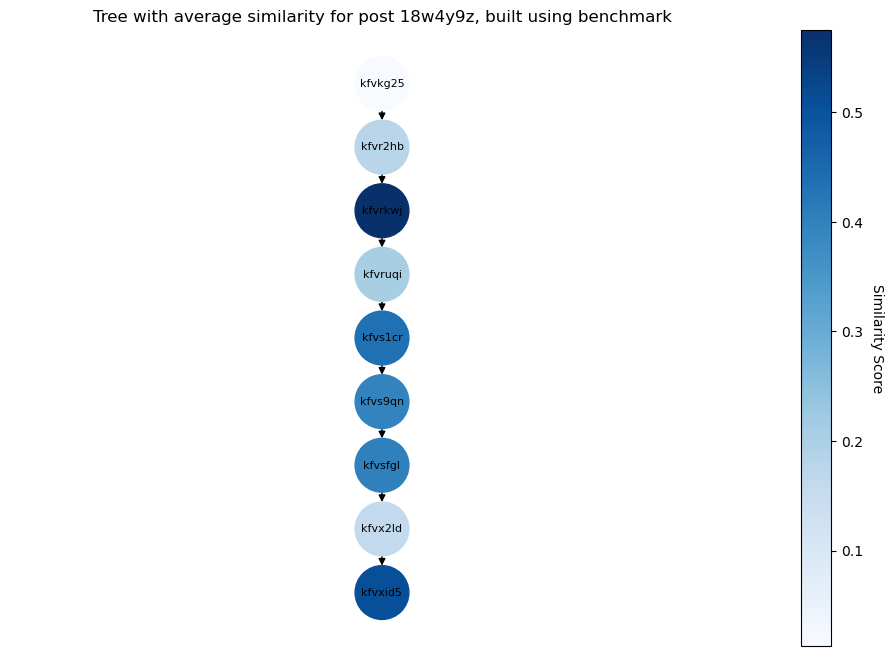

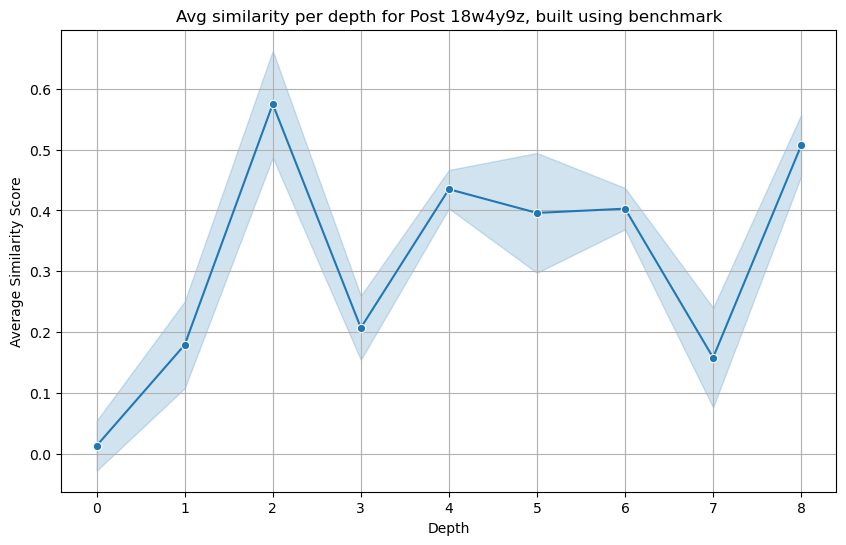

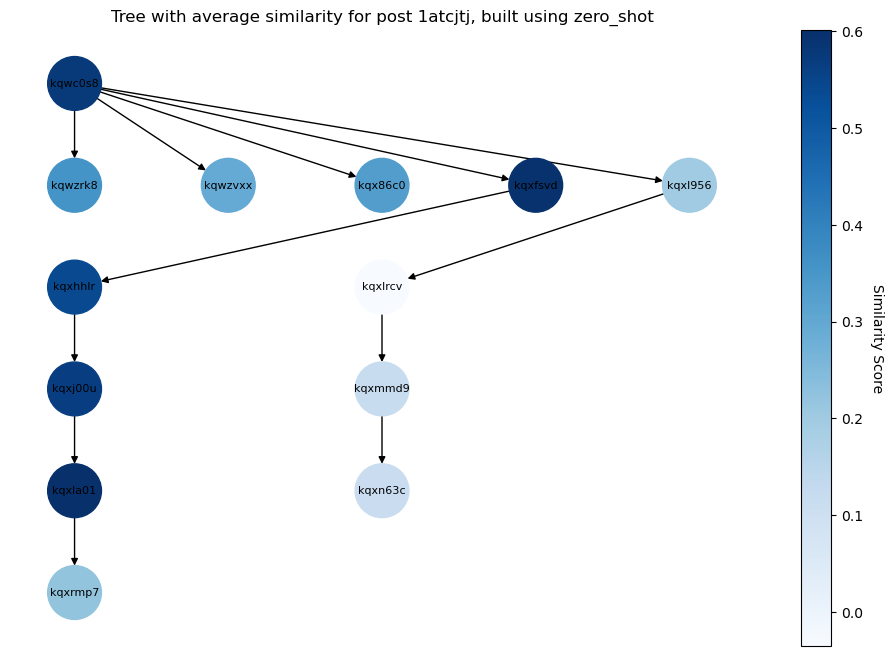

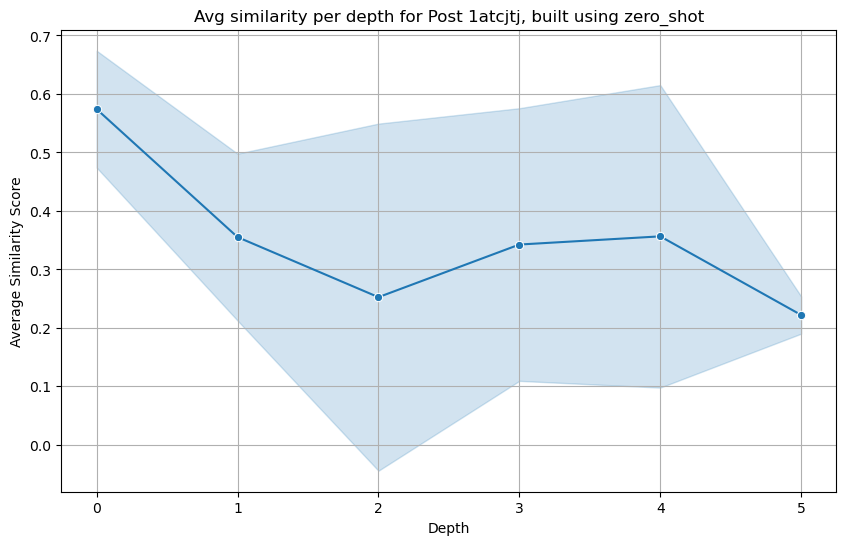

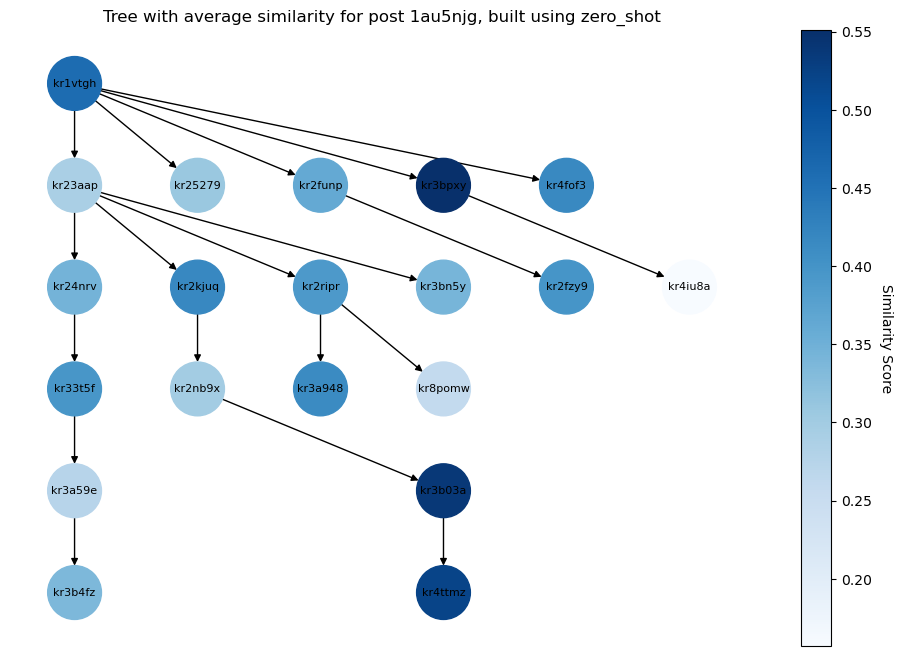

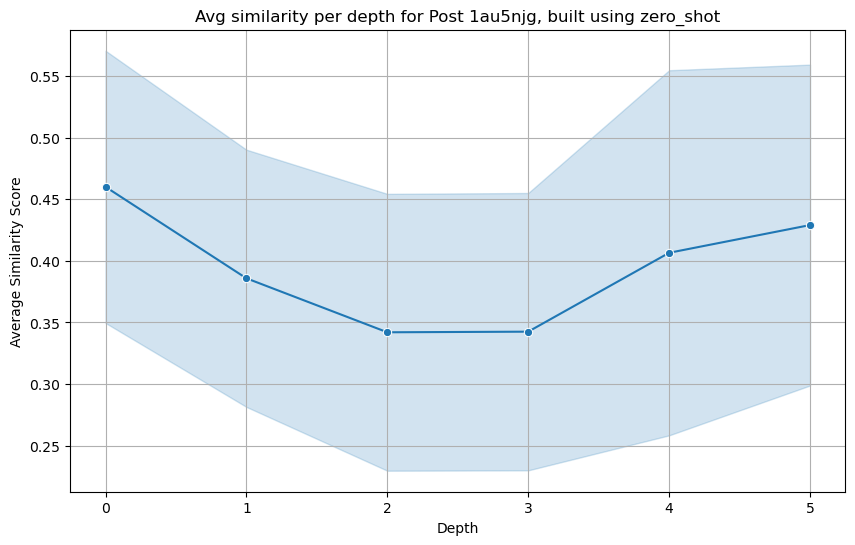

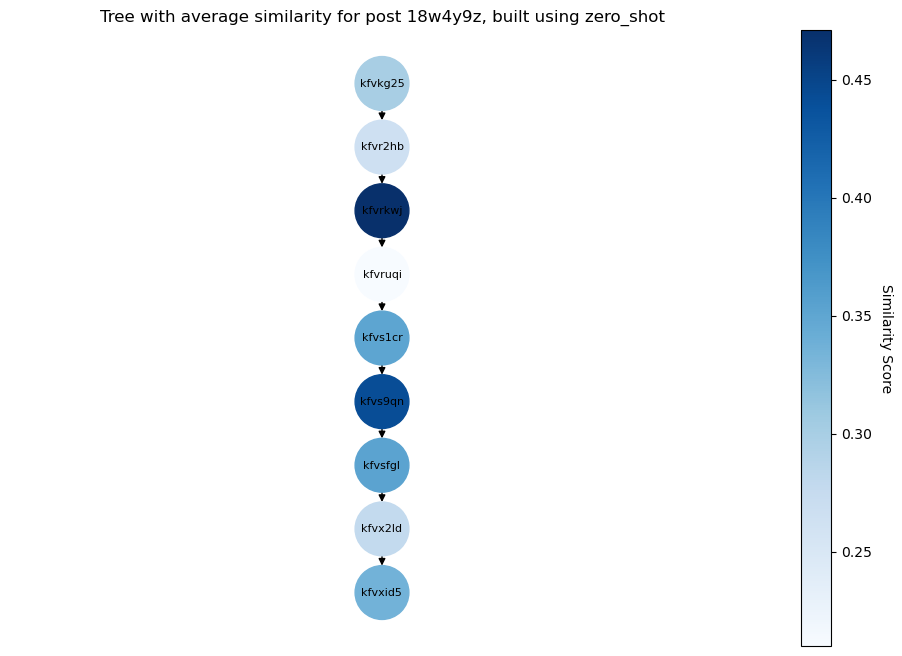

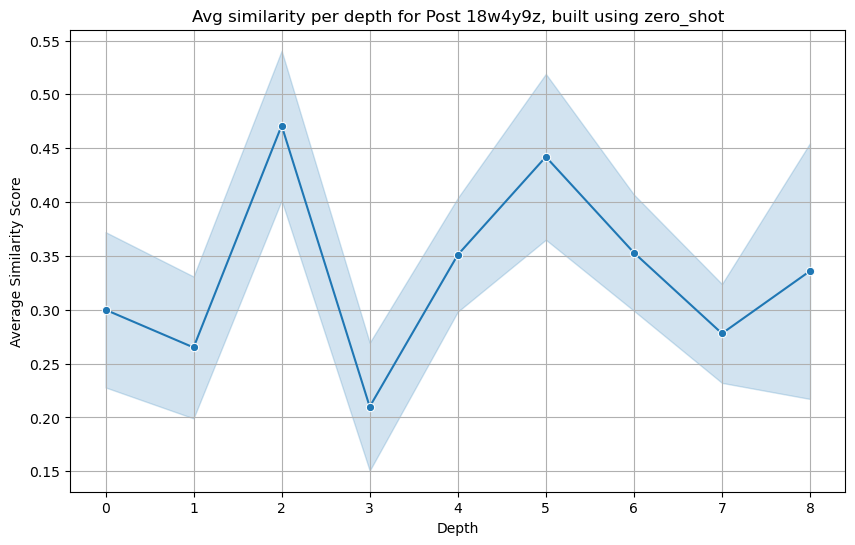

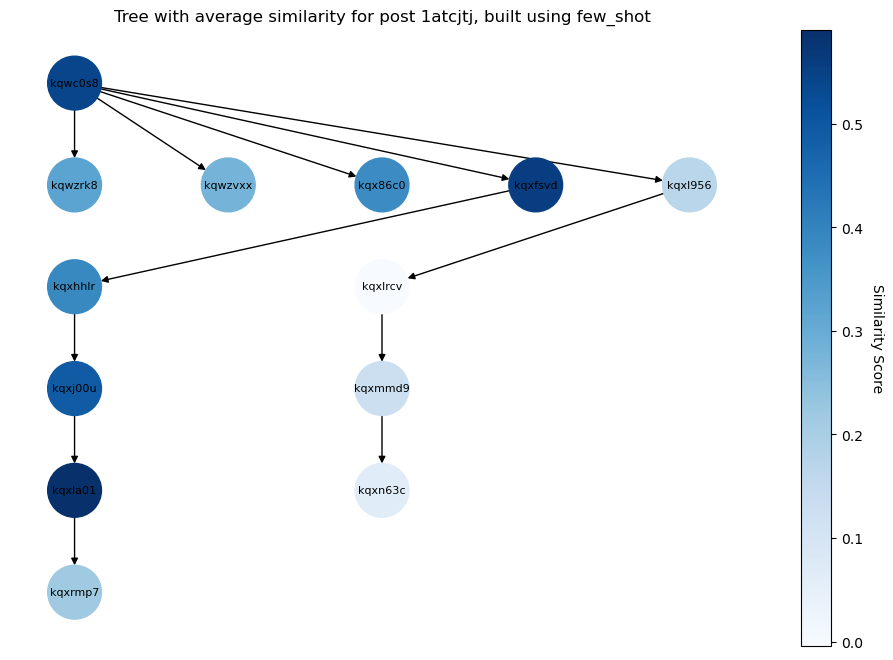

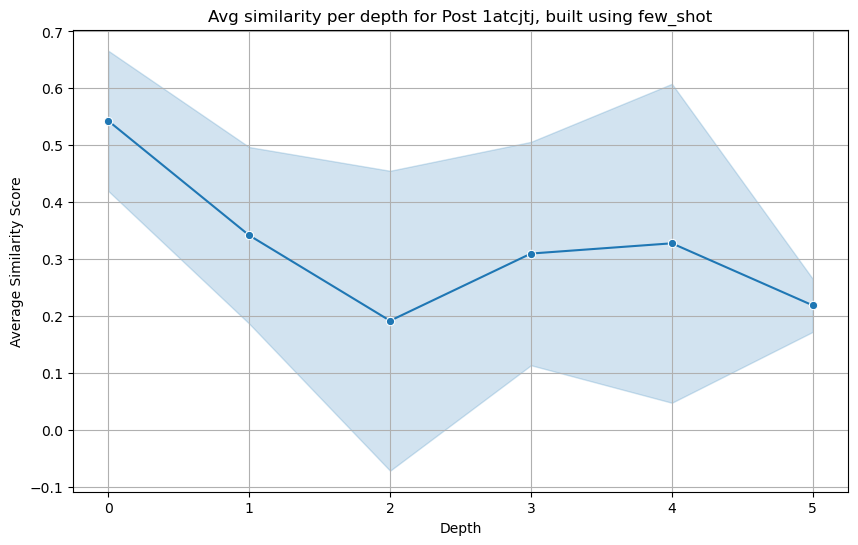

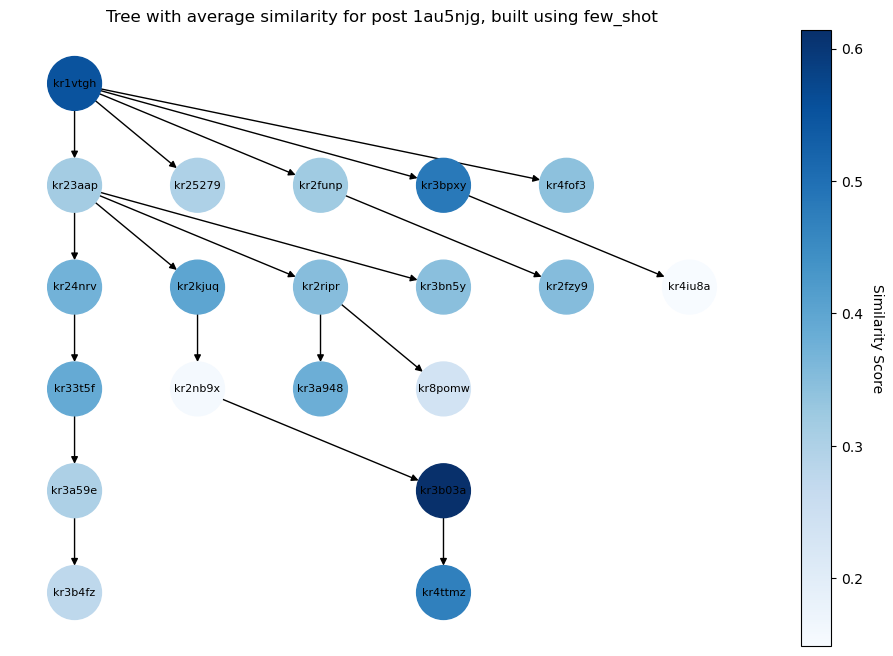

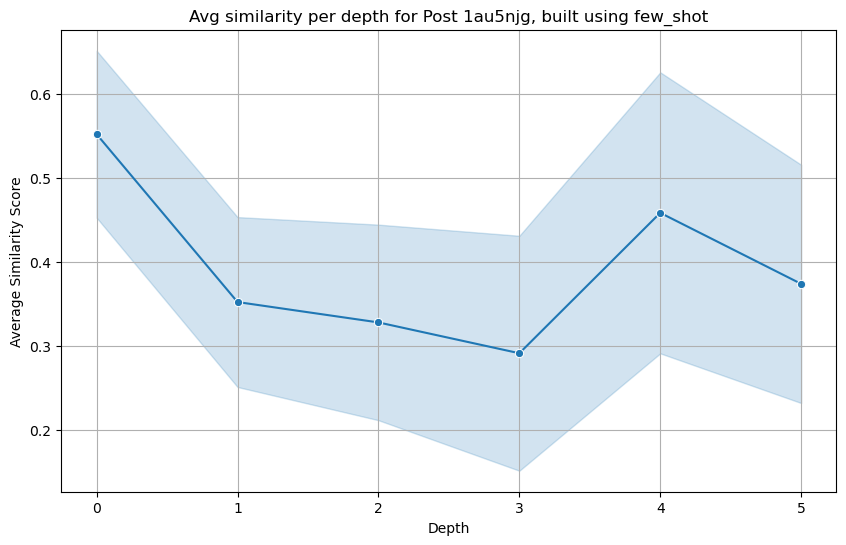

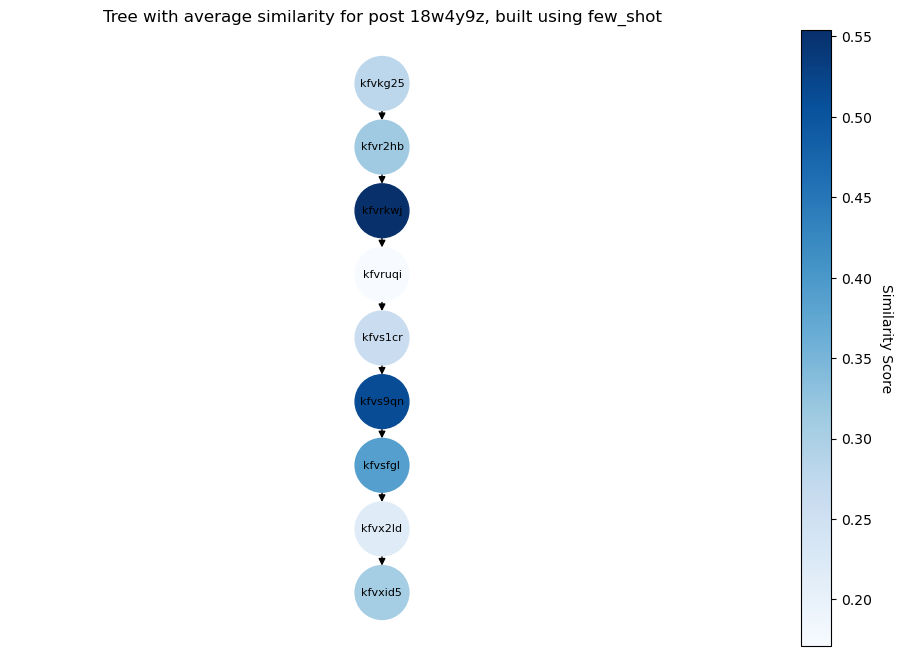

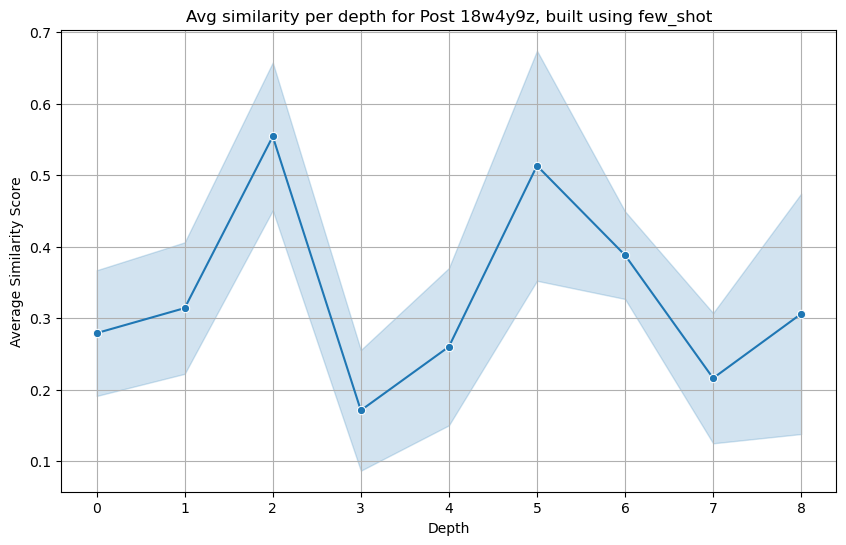

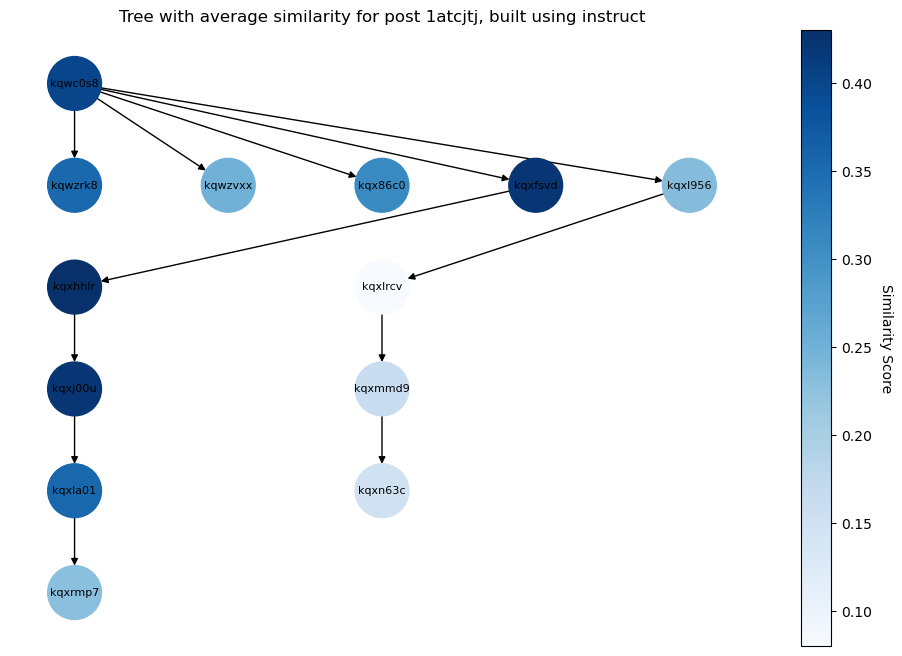

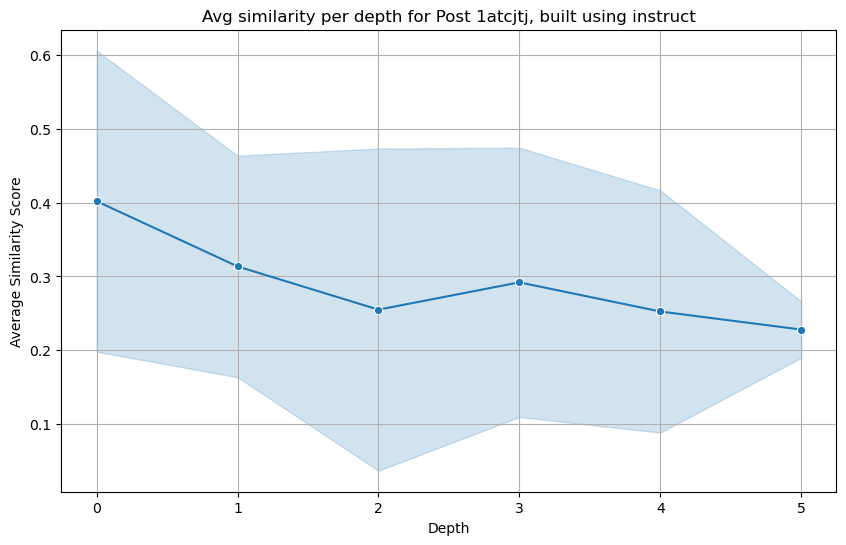

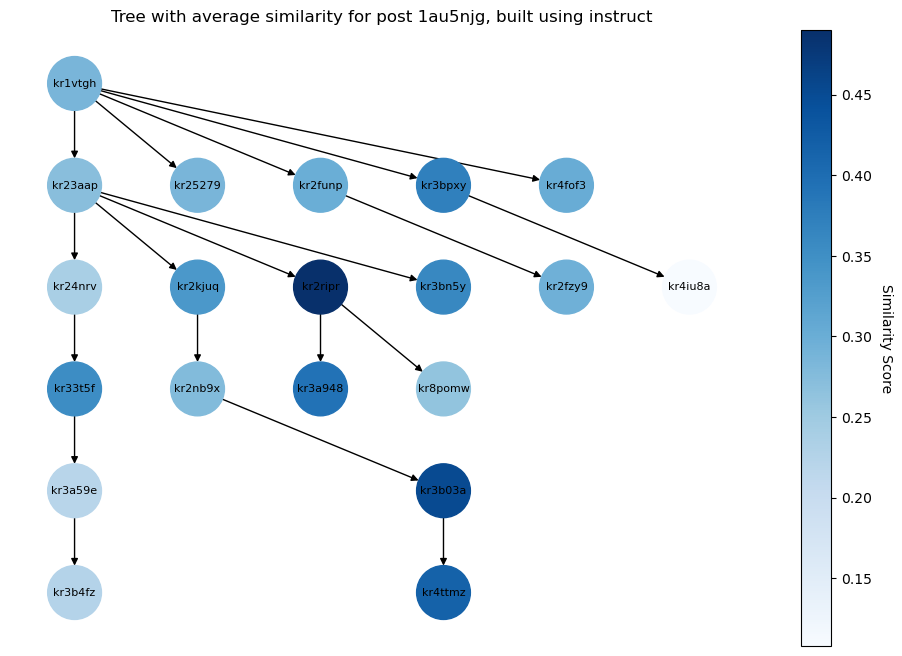

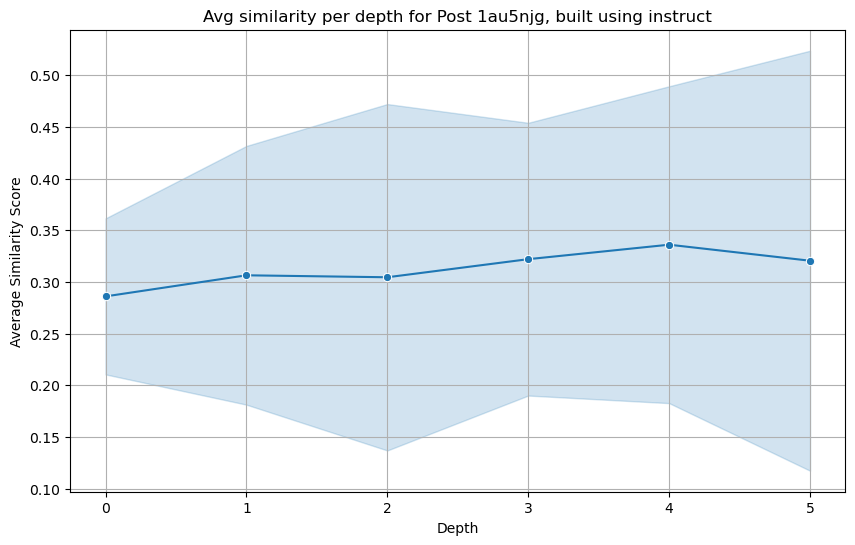

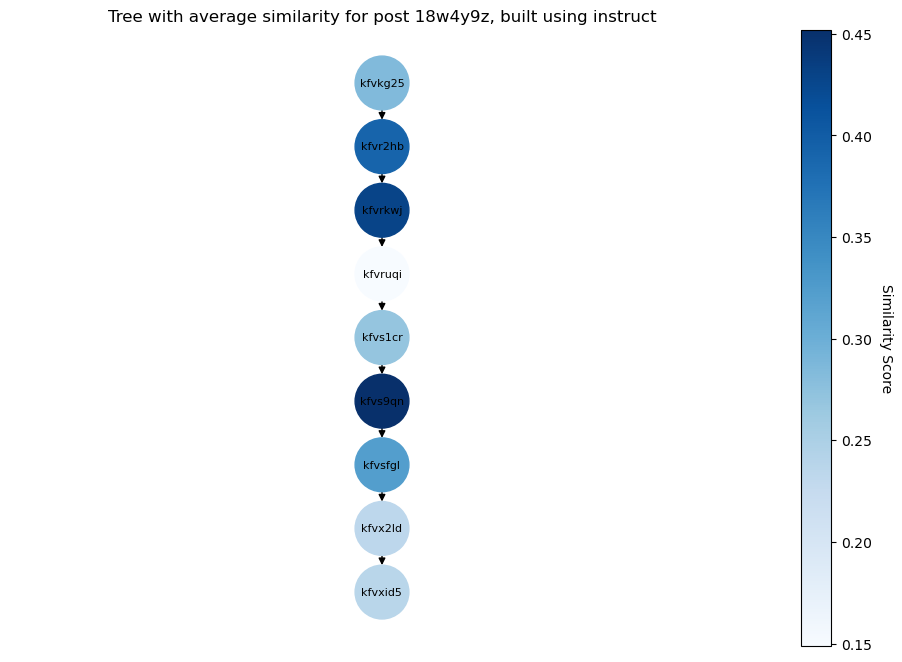

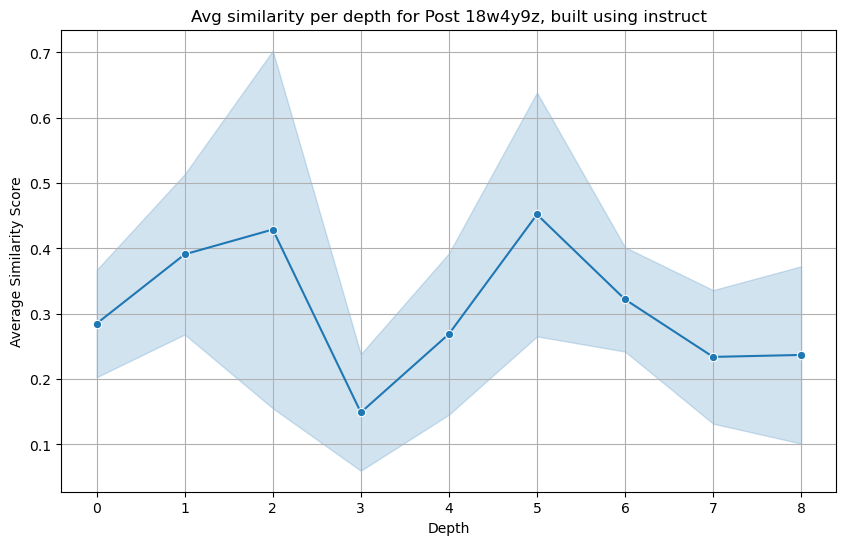

In [4]:
for EXP_NAME in EXP_NAMES:
    for POST_ID in POST_IDS:
        
        folder_path =  os.path.abspath(os.path.join(DATA_BASEPATH, f'eval_results/{EXP_NAME}/{POST_ID}/'))
        df_savepath = os.path.abspath(os.path.join(simdf_path, f'df_{EXP_NAME}_{POST_ID}.csv'))
        
        plotter = PlotSimilarity(folder_path=folder_path)

        deeptrees = plotter.get_deepest_tree()

        overall_avg_similarity = plotter.calculate_average_similarity()

        data[EXP_NAME].append(overall_avg_similarity)

        avgtree, sim_df = plotter.calculate_avg_similarity(deeptrees)

        plotter.save_df(sim_df, df_savepath)

        plotter.plot_similarity_tree(avgtree, EXP_NAME, POST_ID)

        plotter.plot_avg_similarity(sim_df, EXP_NAME, POST_ID)

In [5]:
final_df = pd.DataFrame(data, index=POST_IDS)
final_df.reset_index(inplace=True)
final_df.rename(columns={"index": "post_id"}, inplace=True)

print(final_df)

   post_id  benchmark  zero_shot  few_shot  instruct
0  1atcjtj   0.242104   0.345916  0.326756  0.301578
1  1au5njg   0.997065   0.344624  0.307050  0.274304
2  18w4y9z   0.261479   0.342082  0.315829  0.295716


In [6]:
cmpr_file = os.path.abspath(os.path.join(DATA_BASEPATH, 'eval_results/sim_dfs/average_sim.txt'))

plotter.compute_t_tests_from_df(final_df, cmpr_file)

T-test results written to /Users/smutnuri/Documents/UVA/_Projects/Fall24/CBM/CBMRepo/Data/eval_results/sim_dfs/average_sim.txt


In [7]:
for post in POST_IDS:
    plotter.run_combined_analysis(simdf_path, post, EXP_NAMES)

Results written to /Users/smutnuri/Documents/UVA/_Projects/Fall24/CBM/CBMRepo/Data/eval_results/sim_dfs/combined_analysis_results_1atcjtj.txt
Results written to /Users/smutnuri/Documents/UVA/_Projects/Fall24/CBM/CBMRepo/Data/eval_results/sim_dfs/combined_analysis_results_1au5njg.txt
Results written to /Users/smutnuri/Documents/UVA/_Projects/Fall24/CBM/CBMRepo/Data/eval_results/sim_dfs/combined_analysis_results_18w4y9z.txt
